In [6]:
import json

!python3 get-data.py 
with open("./data/data-dp.json") as f:
    data = json.load(f)

In [7]:
import pandas as pd
jsonfile = "./data/data-dp.json"
datanew = pd.read_json(jsonfile, orient='columns')

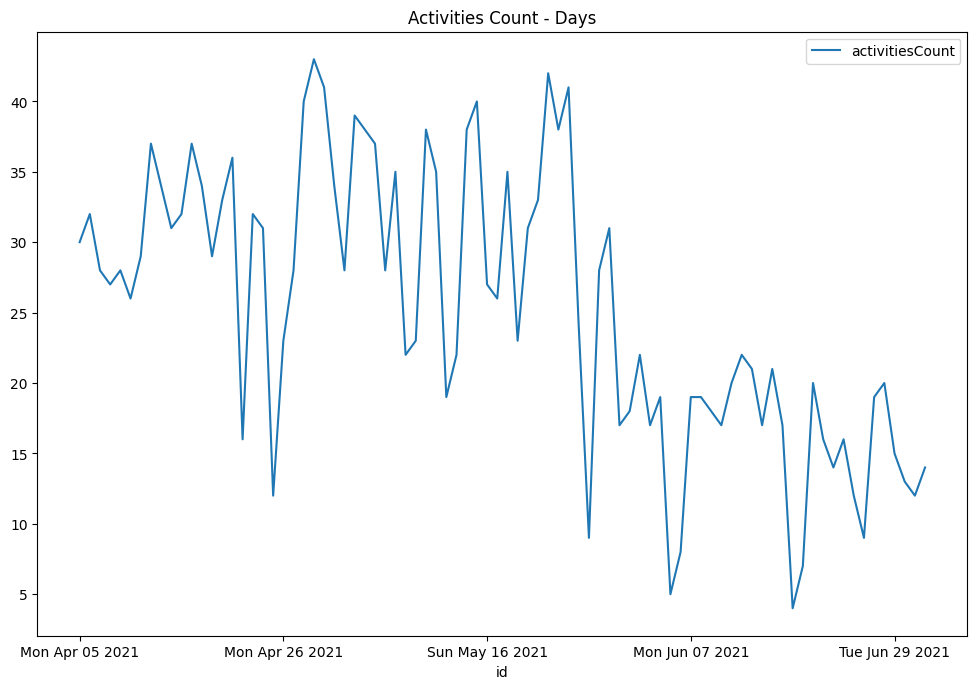

In [8]:
import matplotlib.pyplot as plt
dfAll = pd.DataFrame(data['dp'])

#df.plot( kind='bar')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
dfAll.plot(kind='line', x='id', y='activitiesCount', title='Activities Count - Days')



      reward  activitiesCount
week                         
14     17857              200
15     24075              234
16     12333              160
17     18314              237
18     16436              222
19     16939              219
20     16690              228
21     11186              150
22      7186               89
23      9853              136
24      7881              102
25      4814               70
26      5599               74


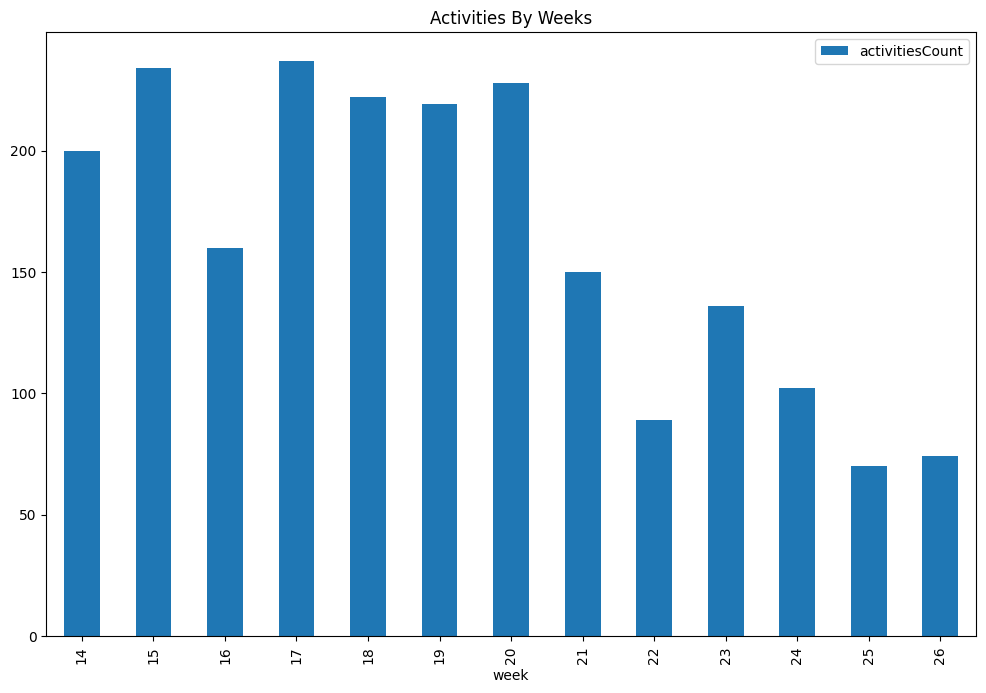

In [9]:

from datetime import datetime

dfAll['week'] = pd.to_datetime(dfAll.id).dt.isocalendar().week
dfByWeek = dfAll.groupby(['week']).sum()
print(dfByWeek)
dfByWeek.plot(kind='bar', y='activitiesCount', use_index=True, title='Activities By Weeks')

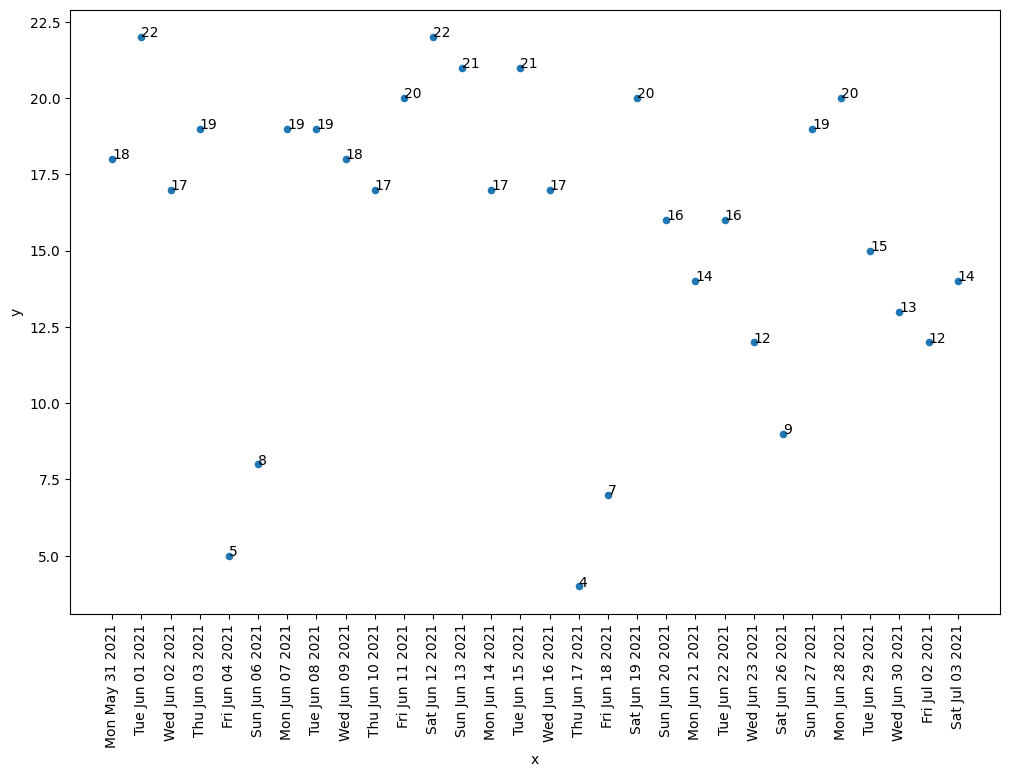

In [10]:
df1 = dfAll.tail(30)
df = pd.DataFrame({'x':df1['id'].tolist(), 'y':df1['activitiesCount'].tolist()},index=df1['activitiesCount'].tolist())

fig, ax = plt.subplots()
df.plot('x', 'y', kind='scatter', ax=ax, rot=90)

for k, v in df.iterrows():
    ax.annotate(k, v)

fig.canvas.draw()